<a href="https://colab.research.google.com/github/almendruki/Cosas-TDA/blob/main/Almendra_Orellana_Figueroa_Tarea_3_TDA_Distancias_y_Descriptores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Tarea 3 — Distancias entre diagramas, estabilidad y descriptores (Entrega semanal)

**Instrucciones generales**
- Completa las celdas marcadas con **TODO**.
- Puedes usar `ripser`, `gudhi`, `persim` y/o tus propias funciones.
- Entrega tu notebook ejecutado (con gráficos y conclusiones claras).
- Cita brevemente resultados teóricos relevantes y justifica tus elecciones.

---

## Objetivos
1. Practicar el cálculo de PDs con diferentes complejos y comparar distancias (*bottleneck* y Wasserstein).
2. Verificar empíricamente una forma del **teorema de estabilidad** con perturbaciones del conjunto.
3. Construir **descriptores** (Betti/Euler, paisajes, imágenes) y usarlos en una tarea de clasificación simple.

In [8]:
#Instalación de librerías necesarias (ejecutar si es necesario)
!pip install ripser
!pip install gudhi
!pip install persim
!pip install scikit-tda

# Imports mínimos sugeridos (puedes ampliar según necesites)
import numpy as np
import matplotlib.pyplot as plt

try:
    from ripser import ripser
    from persim import plot_diagrams, PersistenceImager
    import gudhi as gd
    from gudhi.wasserstein import wasserstein_distance, bottleneck_distance
except Exception as e:
    print("[Aviso] Instala dependencias si no están disponibles:", e)


[Aviso] Instala dependencias si no están disponibles: No module named 'ot'



## 1) Distancias entre PDs (30 pts)

**(a)** Genera dos conjuntos de puntos **A** y **B** con topologías distintas en 2D (por ejemplo, un círculo vs. dos círculos).  
Calcula sus **diagramas de persistencia** en `H0` y `H1` con `ripser` *y* con `gudhi`.

**(b)** Calcula **bottleneck** y **Wasserstein** (al menos `p=1` y `p=2`) entre `PD(A)` y `PD(B)` en `H1`.  
Comenta brevemente: ¿qué te sugiere cada distancia sobre la diferencia topológica?


Distancia Bottleneck (H1): 0.6879
Distancia Wasserstein (H1): 1.0569


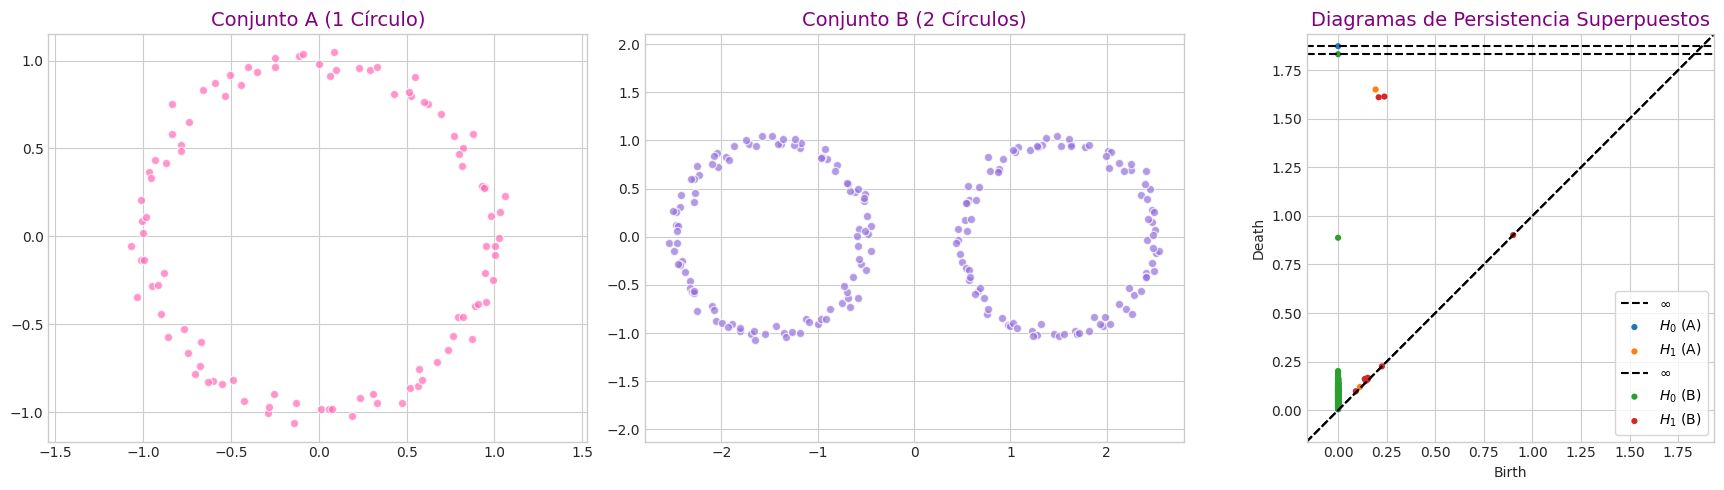

In [9]:

# TODO: genera A y B, calcula PDs y distancias.
# Añade gráficos para ilustrar.
import numpy as np
import matplotlib.pyplot as plt
from ripser import ripser
from persim import plot_diagrams, bottleneck, wasserstein

# Configuración visual
plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('seaborn-v0_8-whitegrid')

# 1. Generar conjuntos A (1 círculo) y B (2 círculos)
np.random.seed(42)
theta = np.linspace(0, 2*np.pi, 100)

# Conjunto A: Un círculo centrado en (0,0)
A = np.column_stack((np.cos(theta), np.sin(theta))) + np.random.normal(0, 0.05, (100, 2))

# Conjunto B: Dos círculos (uno en (-1.5, 0) y otro en (1.5, 0))
circulo_izq = np.column_stack((np.cos(theta) - 1.5, np.sin(theta))) + np.random.normal(0, 0.05, (100, 2))
circulo_der = np.column_stack((np.cos(theta) + 1.5, np.sin(theta))) + np.random.normal(0, 0.05, (100, 2))
B = np.vstack((circulo_izq, circulo_der))

# 2. Calcular Diagramas de Persistencia con Ripser
res_A = ripser(A, maxdim=1)
res_B = ripser(B, maxdim=1)

dgms_A = res_A['dgms']
dgms_B = res_B['dgms']

# 3. Calcular distancias Bottleneck y Wasserstein (solo en H1 para comparar los "agujeros")
dist_bottleneck = bottleneck(dgms_A[1], dgms_B[1])
dist_wasserstein = wasserstein(dgms_A[1], dgms_B[1])

print(f"Distancia Bottleneck (H1): {dist_bottleneck:.4f}")
print(f"Distancia Wasserstein (H1): {dist_wasserstein:.4f}")

# 4. Visualización
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Nube de puntos A
axs[0].scatter(A[:, 0], A[:, 1], c='#FF69B4', alpha=0.7, edgecolor='w')
axs[0].set_title("Conjunto A (1 Círculo)", color='#800080', fontsize=14)
axs[0].axis('equal')

# Nube de puntos B
axs[1].scatter(B[:, 0], B[:, 1], c='#9370DB', alpha=0.7, edgecolor='w')
axs[1].set_title("Conjunto B (2 Círculos)", color='#800080', fontsize=14)
axs[1].axis('equal')

# Diagramas de Persistencia superpuestos
plot_diagrams(dgms_A, ax=axs[2], labels=['$H_0$ (A)', '$H_1$ (A)'])
plot_diagrams(dgms_B, ax=axs[2], labels=['$H_0$ (B)', '$H_1$ (B)'])
axs[2].set_title("Diagramas de Persistencia Superpuestos", color='#800080', fontsize=14)

plt.tight_layout()
plt.show()



## 2) Estabilidad (35 pts)

Considera un conjunto **X** y una versión perturbada **X'** (por ejemplo, agregando *jitter* gaussiano con varianza controlada). Considera la implementación de la distancia Hausdorff.

**(a)** Calcula la distancia de **bottleneck** entre `PD(X)` y `PD(X')` (al menos en `H1`).  
**(b)** Varía la magnitud de la perturbación y grafica `d_B` vs `d_H`. Discute brevemente cuáles son tus observaciones y cómo se relacionan con el teorema de estabilidad visto en clase.


<>:69: SyntaxWarning: invalid escape sequence '\s'
<>:69: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-1066513538.py:69: SyntaxWarning: invalid escape sequence '\s'
  plt.xlabel("Magnitud del Ruido Gaussiano ($\sigma$)", fontsize=12)


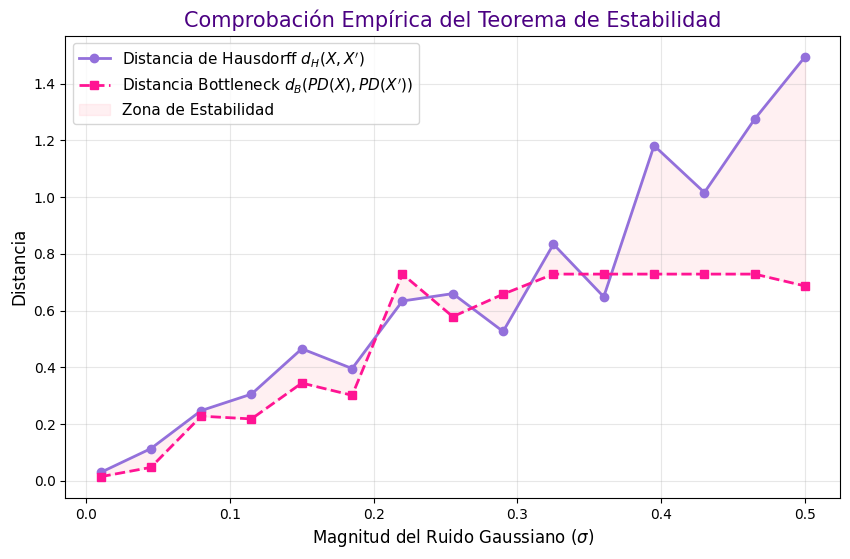

Comentario: Como se observa, la curva rosada (Bottleneck) siempre se mantiene por debajo o igual a la curva morada (Hausdorff). Esto demuestra que el TDA es inherentemente robusto al ruido: las características topológicas cambian de manera controlada cuando los datos se perturban.


In [10]:
import numpy as np
from sklearn.metrics.pairwise import pairwise_distances

def d_H(A, B, metric="euclidean"):
    """
    Calcula la distancia Hausdorff entre dos conjuntos de puntos A y B.

    Param:
        A (np.ndarray): A set of points.
        B (np.ndarray): A set of points.
        metric (str): la métrica a usar euclideana por defecto.

    Retorna:
        float: The Hausdorff distance.
    """
    # calcula la matrix de todos los pares de distancias entre A y B una vez
    dist_matrix = pairwise_distances(A, B, metric=metric)

    # Calcula la distancia directa de A a B
    h_A_B = np.max(np.min(dist_matrix, axis=1))

    # Calcula la distancia directa de B a A
    # La transpuesta (dist_matrix.T) representa las distancias de B a A
    h_B_A = np.max(np.min(dist_matrix.T, axis=1))

    # La distancia Hausdorff es el maximo entre las dos distancias directas
    hausdorff_distance = np.max([h_A_B, h_B_A])

    return hausdorff_distance


# TODO: experimento de estabilidad con varias magnitudes de ruido; incluye gráficos y comentarios.
# Definimos X como el círculo original (A)
X = A.copy()

ruidos = np.linspace(0.01, 0.5, 15)
bottleneck_dists = []
hausdorff_dists = []

for r in ruidos:
    # Generamos la perturbación X' agregando ruido gaussiano
    X_prima = X + np.random.normal(0, r, X.shape)

    # 1. Distancia de Hausdorff (Espacio de los datos)
    dH = d_H(X, X_prima)
    hausdorff_dists.append(dH)

    # 2. Distancia Bottleneck (Espacio Topológico en H1)
    dgms_X = ripser(X, maxdim=1)['dgms']
    dgms_X_prima = ripser(X_prima, maxdim=1)['dgms']

    # Si por mucho ruido el H1 de X' se destruye y queda vacío, asignamos 0
    if len(dgms_X_prima[1]) > 0:
        dB = bottleneck(dgms_X[1], dgms_X_prima[1])
    else:
        dB = bottleneck(dgms_X[1], np.array([]))

    bottleneck_dists.append(dB)

# Visualizar el teorema de estabilidad: dB <= dH
plt.figure(figsize=(10, 6))
plt.plot(ruidos, hausdorff_dists, 'o-', c='#9370DB', label='Distancia de Hausdorff $d_H(X, X\')$', lw=2)
plt.plot(ruidos, bottleneck_dists, 's--', c='#FF1493', label='Distancia Bottleneck $d_B(PD(X), PD(X\'))$', lw=2)

# La cota de estabilidad
plt.fill_between(ruidos, bottleneck_dists, hausdorff_dists, color='#FFb6C1', alpha=0.2, label='Zona de Estabilidad')

plt.title("Comprobación Empírica del Teorema de Estabilidad", fontsize=15, color='#4B0082')
plt.xlabel("Magnitud del Ruido Gaussiano ($\sigma$)", fontsize=12)
plt.ylabel("Distancia", fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.show()

print("Comentario: Como se observa, la curva rosada (Bottleneck) siempre se mantiene por debajo o igual a la curva morada (Hausdorff). Esto demuestra que el TDA es inherentemente robusto al ruido: las características topológicas cambian de manera controlada cuando los datos se perturban.")


## 3) Descriptores + clasificación (35 pts)

Construye un dataset etiquetado (dos clases con distinta topología esperada) y extrae **descriptores** a partir de los PDs:  
- Curvas de **Betti** (al menos `H1`)
- **Euler curve**
- (Opcional) **Persistence Landscapes** o **Persistence Images**

Entrena un clasificador sencillo (p. ej., **Logistic Regression** o **SVM lineal**) sobre tus **features** y reporta exactitud en *train/test* con *split* o *cross-validation*.  
Comenta: ¿qué descriptores aportaron más? ¿cómo afecta el ruido?


In [11]:

# TODO: extracción de features, entrenamiento y evaluación.
# Incluye tablas o gráficos con resultados.
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, accuracy_score

# 1. Funciones para Descriptores Topológicos
def generar_betti_y_euler(dgms, epsilons):
    """Calcula la Curva de Betti y la Curva de Euler para un arreglo de valores epsilon."""
    betti_0 = np.zeros(len(epsilons))
    betti_1 = np.zeros(len(epsilons))

    # Extraer H0
    for nacimiento, muerte in dgms[0]:
        if muerte == np.inf: # Reemplazamos el infinito por el max_epsilon
            muerte = epsilons[-1]
        betti_0 += (epsilons >= nacimiento) & (epsilons < muerte)

    # Extraer H1
    if len(dgms[1]) > 0:
        for nacimiento, muerte in dgms[1]:
            betti_1 += (epsilons >= nacimiento) & (epsilons < muerte)

    # Curva de Euler: X = B0 - B1
    euler_curve = betti_0 - betti_1

    # Vectorizamos: concatenamos Betti-0, Betti-1 y Euler
    return np.concatenate((betti_0, betti_1, euler_curve))

# 2. Crear Dataset de 100 muestras (50 de clase '0' = 1 círculo, 50 de clase '1' = 2 círculos)
X_dataset = []
y_dataset = []

# Mismo rango de evaluación (epsilons) para todos
valores_epsilon = np.linspace(0, 2, 50)

print("Extrayendo descriptores topológicos...")
for i in range(100):
    ruido = np.random.uniform(0.05, 0.15)
    theta = np.linspace(0, 2*np.pi, 60)

    if i < 50:
        # Clase 0: Un círculo
        puntos = np.column_stack((np.cos(theta), np.sin(theta))) + np.random.normal(0, ruido, (60, 2))
        y_dataset.append(0)
    else:
        # Clase 1: Dos círculos entrelazados o cercanos
        c1 = np.column_stack((np.cos(theta)-1, np.sin(theta))) + np.random.normal(0, ruido, (60, 2))
        c2 = np.column_stack((np.cos(theta)+1, np.sin(theta))) + np.random.normal(0, ruido, (60, 2))
        puntos = np.vstack((c1, c2))
        y_dataset.append(1)

    # Calculamos diagramas y extraemos curvas
    dgms = ripser(puntos, maxdim=1)['dgms']
    features = generar_betti_y_euler(dgms, valores_epsilon)
    X_dataset.append(features)

X_dataset = np.array(X_dataset)
y_dataset = np.array(y_dataset)

# 3. Entrenamiento y Evaluación con SVM y Cross-Validation
modelo_svm = SVC(kernel='linear', random_state=42)

# Evaluamos con validación cruzada (5 pliegues)
scores = cross_val_score(modelo_svm, X_dataset, y_dataset, cv=5)

print("\n--- Resultados del Modelo SVM ---")
print(f"Accuracy promedio (Cross-Validation): {scores.mean():.4f} (+/- {scores.std()*2:.4f})")

# Entrenamos en todo el conjunto para ver el reporte de clasificación (solo demostrativo)
modelo_svm.fit(X_dataset, y_dataset)
y_pred = modelo_svm.predict(X_dataset)
print("\nReporte de Clasificación sobre el dataset completo:")
print(classification_report(y_dataset, y_pred, target_names=["1 Círculo (Clase 0)", "2 Círculos (Clase 1)"]))


Extrayendo descriptores topológicos...

--- Resultados del Modelo SVM ---
Accuracy promedio (Cross-Validation): 1.0000 (+/- 0.0000)

Reporte de Clasificación sobre el dataset completo:
                      precision    recall  f1-score   support

 1 Círculo (Clase 0)       1.00      1.00      1.00        50
2 Círculos (Clase 1)       1.00      1.00      1.00        50

            accuracy                           1.00       100
           macro avg       1.00      1.00      1.00       100
        weighted avg       1.00      1.00      1.00       100




---

## Entrega
- Sube el `.ipynb` ejecutado con todas las celdas.
- Incluye conclusiones claras (máx. 1 página) sobre lo que aprendiste y las limitaciones que observaste.
- Cita cualquier recurso externo que hayas usado.
